# Extracting DOS data, binning and saving to a csv

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct  3 22:53:01 2023

@author: hkpen
"""
import numpy as np
np.set_printoptions(threshold=np.inf)

import json
import sys
import os
import pymatgen
from pymatgen.core import Lattice, Structure, Molecule
#from matminer.featurizers.site import CrystalNNFingerprint
#from matminer.featurizers.structure import SiteStatsFingerprint
import numpy as np
import matplotlib.pyplot as plt
import chemparse


count=0
D={}

open and read db file

read data for each mat

2dm-9 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-35 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-69 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-77 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-106 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-113 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-116 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-151 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-168 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-212 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-246 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-291 not fou

2dm-1969 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-1972 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-1978 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-1992 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-2000 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-2012 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-2028 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-2031 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-2034 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-2038 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-2060 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))

2dm-3241 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3245 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3250 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3252 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3263 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3267 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3276 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3280 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3284 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3286 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
No such file C:/Users/hkpen/MPhys_Project/data extraction+fingerprinting/FULL_MATPEDIA_DAT

2dm-3560 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3562 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3565 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3570 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3573 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3575 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
No such file C:/Users/hkpen/MPhys_Project/data extraction+fingerprinting/FULL_MATPEDIA_DATA/dos/2dm-3576.json
2dm-3581 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3588 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3601 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-3613 not found in flatness score file
(array([], dtype=int64), arra

2dm-4175 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4177 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4181 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4184 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4185 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4191 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4193 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
No such file C:/Users/hkpen/MPhys_Project/data extraction+fingerprinting/FULL_MATPEDIA_DATA/dos/2dm-4194.json
2dm-4204 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4211 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4218 not found in flatness score file
(array([], dtype=int64), arra

2dm-4586 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4596 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4602 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4616 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4618 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4621 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4625 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4628 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4632 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4633 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-4638 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))

2dm-5096 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5104 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5110 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5123 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5142 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5144 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5147 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5151 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5156 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5164 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5184 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))

2dm-5696 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5699 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5700 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5701 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5704 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5712 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5714 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
No such file C:/Users/hkpen/MPhys_Project/data extraction+fingerprinting/FULL_MATPEDIA_DATA/dos/2dm-5718.json
2dm-5719 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5720 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5727 not found in flatness score file
(array([], dtype=int64), arra

2dm-5915 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5916 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5917 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5918 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5919 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5920 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5921 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5922 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5923 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5924 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-5925 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))

2dm-6060 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6061 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6062 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6063 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6064 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6065 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6066 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6067 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6068 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6069 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6070 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))

(array([], dtype=int64), array([], dtype=int64))
2dm-6218 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6219 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6220 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6221 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6222 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6223 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6224 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6225 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6226 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6227 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6228 not found in flatness score file

2dm-6360 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6361 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6362 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6363 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6364 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6365 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
2dm-6366 not found in flatness score file
(array([], dtype=int64), array([], dtype=int64))
[3.0, 21.0, 22.0, 25.0, 29.0, 31.0, 32.0, 34.0, 56.0, 6370.0, 79.0, 85.0, 86.0, 89.0, 101.0, 103.0, 107.0, 111.0, 119.0, 121.0, 128.0, 129.0, 131.0, 138.0, 142.0, 144.0, 147.0, 149.0, 153.0, 155.0, 157.0, 161.0, 164.0, 165.0, 167.0, 180.0, 183.0, 190.0, 192.0, 197.0, 202.0, 206.0, 209.0, 213.0, 214.0, 218.0, 222.0, 224.0, 229.0, 230.0, 231.0, 234.0, 248.0, 249.

Error: iterable expected, not float

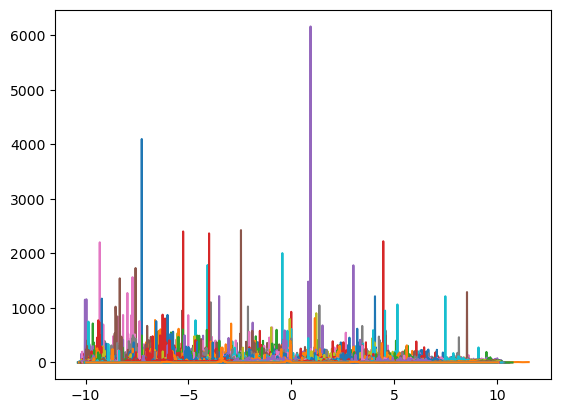

In [37]:
###################### Read flatness core csv to find which horizontal seg is flat
import csv
Inp=[]
with open('All_mat_new_test_score_with_horz_flat_index.csv','r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        Inp.append(row)
Input=np.array(Inp)

all_fingerprints = []
all_flat_mat_indices = []

# DOS fingerprint parameters 
DOS_fingerprint_length = 250 # clustering may be sensitive to this! - encoding of sharp peaks is very sensitive to this
                             # as if the value is too low, sharp peaks get averaged out and so the flat band corresponding to
                             # the peak isnt enconded as being as flat as it is
E_shifted_lower_bound = -9 # eV
E_shifted_upper_bound = 9 # eV

# create list of energies between which, the DOS value is averaged (ensures fingerprints are same length for all materials)
energy_bins = np.linspace(E_shifted_lower_bound, E_shifted_upper_bound, DOS_fingerprint_length)
#print(energy_bins)

# HENRY SYSTEM PATHS TO MATERIAL DATA
path_db = 'C:/Users/hkpen/MPhys_Project/data extraction+fingerprinting/'
path_full_data = henry_path_db+'FULL_MATPEDIA_DATA/'

# TOM SYSTEM PATHS TO MATERIAL DATA

with open(path_db+'db.json') as f:
        for jsonobj in f:
                count=count+1
                strDict=json.loads(jsonobj)
                matid=strDict['material_id']
                try:
                    indexx=np.where(Input==matid)[0][0]  ### Find entry in the flatband_score file
                except:
                    print(str(matid)+" not found in flatness score file")
                    print(np.where(Input==matid))
                    continue
                mid=matid.split('-')
                mmid=float(mid[1])
                if mmid > 0 and mmid < 6500 and float(Input[indexx,9]) > 0:     
                    ##### condition requires predicted flat materials within mmid bound
                    DOS_dir= path_full_data+'dos/'
                    filename_dos=DOS_dir+matid+'.json'
                    if not os.path.isfile(filename_dos):      ###when DOS is not available
                        print("No such file %s" % filename_dos)
                        formulae=strDict['formula_pretty']
                        #print(formulae)
                        list_comp=chemparse.parse_formula(formulae)
                        #print(type(list_comp))
                        bb=min(list_comp, key=list_comp.get)
                        #print(bb)
                        
                    else:
                        dos_dict=json.load(open(filename_dos))   ### when atom projected DOS is available
                        E_fermi=dos_dict['efermi']
                        
                        energies = np.array(dos_dict['energies'])
                        densities = np.array(dos_dict['densities']['1'])
                        
                        #print(energies)
                        #print(densities)
                        
                        shifted_E = energies-E_fermi*np.ones(len(energies))
                        #print(shifted_E)
                        plt.plot(shifted_E, densities)
                        
#                         plt.ylabel('density of states (states / eV)')
#                         plt.xlabel('energy-E_fermi / eV')
#                         plt.xlim(-10,10)
#                         plt.show()
                        
                        # array to store averaged DOS values as the fingerprint
                        DOS_fingerprint = np.array([])
                        
                        # for each energy bin, find the DOS values corresponding to energies in this range, and average them
                        # this gives one value in the DOS fingerprint
                        for i in range(len(energy_bins)-1):
                            E_slice_mask = (shifted_E>=energy_bins[i]) & (shifted_E<=energy_bins[i+1])
                            DOS_fingerprint = np.append(DOS_fingerprint, np.average(densities[E_slice_mask]))
                            
                            
#                         plt.plot(energy_bins[:-1], DOS_fingerprint)
#                         plt.ylabel('density of states (states / eV)')
#                         plt.xlabel('energy-E_fermi / eV')
#                         plt.xlim(-10,10)
#                         plt.show()
                        
                        #print(shifted_E[range_mask])
                        #print(len(DOS_fingerprint))
                        #print(densities)
                        #DOS_fingerprint = densities[range_mask][:1000]

                        
                        all_fingerprints.append(DOS_fingerprint)
                        all_flat_mat_indices.append(mmid)
                        
                        #print(all_fingerprints)
                        
print(all_flat_mat_indices)               
# Specify the file name and open the CSV file in write mode
csv_filename = "flat_mat_DOS_fingerprints.csv"
csv_filename_2 = "flat_mat_DOS_indices.csv"

with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write each array as a row in the CSV file
    for DOS in all_fingerprints:
        #print(DOS)
        writer.writerow(DOS)
        


In [39]:
np.savetxt(csv_filename_2, all_flat_mat_indices, delimiter=",", fmt="%s")